<a href="https://colab.research.google.com/github/srikar0313/ML-projects/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sms
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
data=pd.read_csv("/content/sample_data/gld_price_data.csv")

In [ ]:
data.head()#1st 5 columns

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
data.tail()#last 5 column

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
data.shape

(2290, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
correlation=data.corr()

<ipython-input-14-7f2487af4b08>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data.corr()


<Axes: >

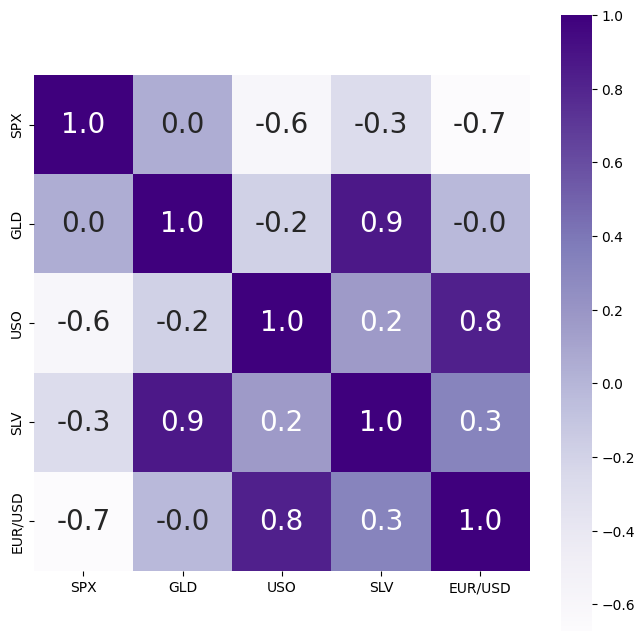

In [ ]:
plt.figure(figsize=(8,8))
sms.heatmap(correlation,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":20},cmap="Purples")

In [ ]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-31-2b625eb449b4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sms.distplot(data['GLD'],color="Purple")


<Axes: xlabel='GLD', ylabel='Density'>

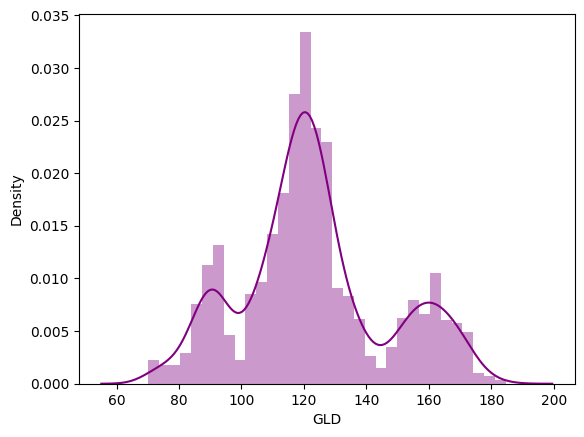

In [ ]:
sms.distplot(data['GLD'],color="Purple")

In [ ]:
X=data.drop(["GLD","Date"],axis=1)
Y=data["GLD"]

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
regressor=RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
test_data_prediction=regressor.predict(X_test)
print(test_data_prediction)

[168.7622991   82.23459977 116.21310029 127.67870088 120.78530125
 154.77759766 150.18379787 126.04820089 117.51689898 126.1513003
 116.95720054 171.88970059 141.94789831 167.77129905 115.35039999
 117.68250059 137.95870254 169.81490059 159.99250369 157.00049962
 155.0689004  125.24880008 175.64779964 157.64520313 125.23990029
  93.60099955  76.31590043 120.52330012 119.05029916 167.47679977
  88.07190045 125.25399964  91.19730102 117.7445003  121.07779912
 136.27270072 115.55820143 114.90120063 147.63489959 107.39020097
 104.60080265  87.12779764 126.44890058 118.08989994 155.1747994
 119.66489989 108.30530004 107.82849813  93.21180031 127.16129783
  74.48950064 113.6413995  121.13520022 111.3517992  118.90319903
 120.79709945 159.47980021 167.22650085 147.04639739  85.81109866
  94.3766004   86.80619893  90.4142002  118.96750084 126.65600005
 127.70950024 170.48889954 122.35269936 117.44719857  98.37390036
 168.56150209 143.21559883 131.54940273 121.15020241 120.53269947
 119.8379008

In [ ]:
#R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R squared')
print(error_score)

R squared
0.9891849674863739


In [ ]:
Y_test=list(Y_test)

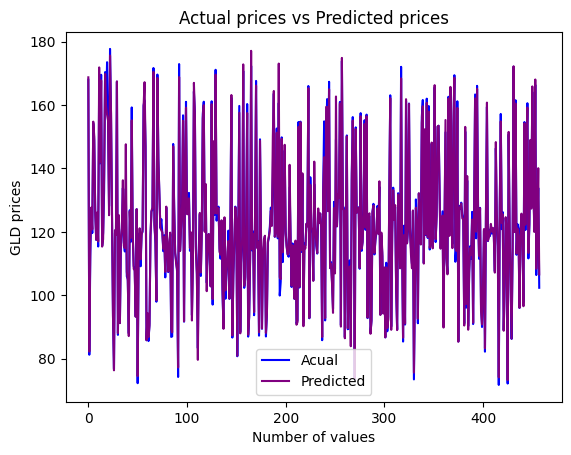

In [ ]:
plt.plot(Y_test,color='blue',label="Acual")
plt.plot(test_data_prediction,color="purple",label="Predicted")
plt.title("Actual prices vs Predicted prices")
plt.xlabel("Number of values")
plt.ylabel("GLD prices")
plt.legend()
plt.show()